<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import torch
#e = math.exp(1);

def SBPmodel(ptt,Ka, Kb, Kc):
  return Kb + (2/0.031)*torch.log(Kc/ptt) + 2*Ka/(3*(ptt**2)) -33
  #return Kb - Ka/(3*(ptt**2))
def model(ptt,Ka,Kb,Kc):
  return Kb + (2/0.031)*torch.log(Kc/ptt) - 1*Ka/(3*(ptt**2))


In [ ]:
model(1,1,2,1)

In [ ]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()


In [ ]:
#t_c =[12.0,	4.50,	3.11,	2.625,	2.40,	2.277,	2.204,	2.156,	2.123,	2.10,	2.082,	2.069,	2.05,	2.05,	2.044,	2.039,	2.034,	2.0308,	2.027,	2.025]
#t_u =[5.0,	1.25,	0.55,	0.312,	0.20,	0.138,	0.102,	0.0781,	0.061,	0.050,	0.041,	0.0347,	0.029,	0.025,	0.022,	0.019,	0.017,	0.015,	0.013,	0.0125]
#t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
#t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_u = [19.215, 19.09, 19.59, 19.89, 20.437]
t_c = [64.0, 60.0, 60.0, 60.0, 61.0]
t_s = [107.0, 114.0, 101.0, 97.0, 94.0]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_s = torch.tensor(t_s)

In [ ]:
len(t_c)

20

In [ ]:
import torch

Ka = torch.ones(())
Kb = torch.zeros(())
Kc = torch.ones(())

t_p = model(t_u, Ka, Kb, Kc)
t_p

tensor([-190.6880, -190.2668, -191.9350, -192.9155, -194.6659])

In [ ]:
loss = loss_fn(t_p, t_c)
loss

tensor(86877.2812)

In [ ]:
delta = 0.1
loss_rate_of_change_Ka = \
(loss_fn(model(t_u, Ka + delta, Kb, Kc), t_c) -
loss_fn(model(t_u, Ka - delta, Kb, Kc), t_c)) / (2.0 * delta)

In [ ]:
# In[9]:
learning_rate = 1e-2
Ka = Ka - learning_rate * loss_rate_of_change_Ka

loss_rate_of_change_Kb = \
(loss_fn(model(t_u, Ka, Kb + delta,Kc), t_c) -
loss_fn(model(t_u, Ka, Kb - delta,Kc), t_c)) / (2.0 * delta)
Kb = Kb - learning_rate * loss_rate_of_change_Kb

loss_rate_of_change_Kc = \
(loss_fn(model(t_u, Ka, Kb, Kc + delta), t_c) -
loss_fn(model(t_u, Ka, Kb, Kc - delta), t_c)) / (2.0 * delta)
Kc = Kc - learning_rate * loss_rate_of_change_Kc

In [ ]:
Ka, Kb , Kc

(tensor(1.0105), tensor(5.8945), tensor(375.3141))

In [ ]:
# derivative of parameters
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dKa(t_u, Ka, Kb,Kc):
  return -1/(3*t_u**2)
# In[13]:
def dmodel_dKb(t_u, Ka, Kb,Kc):
  return 1.0

def dmodel_dKc(t_u, Ka, Kb,Kc):
  return 2/(0.031*Kc)

In [ ]:
# In[14]:
def grad_fn(t_u, t_c, t_p, Ka, Kb, Kc):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dKa = dloss_dtp * dmodel_dKa(t_u, Ka, Kb, Kc)
  dloss_dKb = dloss_dtp * dmodel_dKb(t_u, Ka, Kb, Kc)
  dloss_dKc = dloss_dtp * dmodel_dKc(t_u, Ka, Kb, Kc)
  return torch.stack([dloss_dKa.sum(), dloss_dKb.sum(), dloss_dKc.sum()])  

In [ ]:
#In[15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()
    #Ka, Kb, Kc = params
    t_p = model(t_u, Ka, Kb, Kc)
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, Ka, Kb, Kc)
    
    params = params - learning_rate * grad
    
    if (epoch%1000 == 0):
      
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  
  return params

In [ ]:
import torch.optim as optim
dir(optim)

In [ ]:
params = training_loop(
  n_epochs = 10000,
  learning_rate = 1e-2,
  params = torch.tensor([28500,100,1]),#157600,   -200.5929,   1993.5204 [100999.7656,   -209.7476,   1993.2222]
  t_u = t_u,
  t_c = t_c)
params

Epoch 1000, Loss 2.271288
Epoch 2000, Loss 2.271288
Epoch 3000, Loss 2.271288
Epoch 4000, Loss 2.271288
Epoch 5000, Loss 2.271288
Epoch 6000, Loss 2.271288
Epoch 7000, Loss 2.271288
Epoch 8000, Loss 2.271288
Epoch 9000, Loss 2.271288
Epoch 10000, Loss 2.271288


tensor([2.8500e+04, 1.4194e+02, 8.2090e+00])

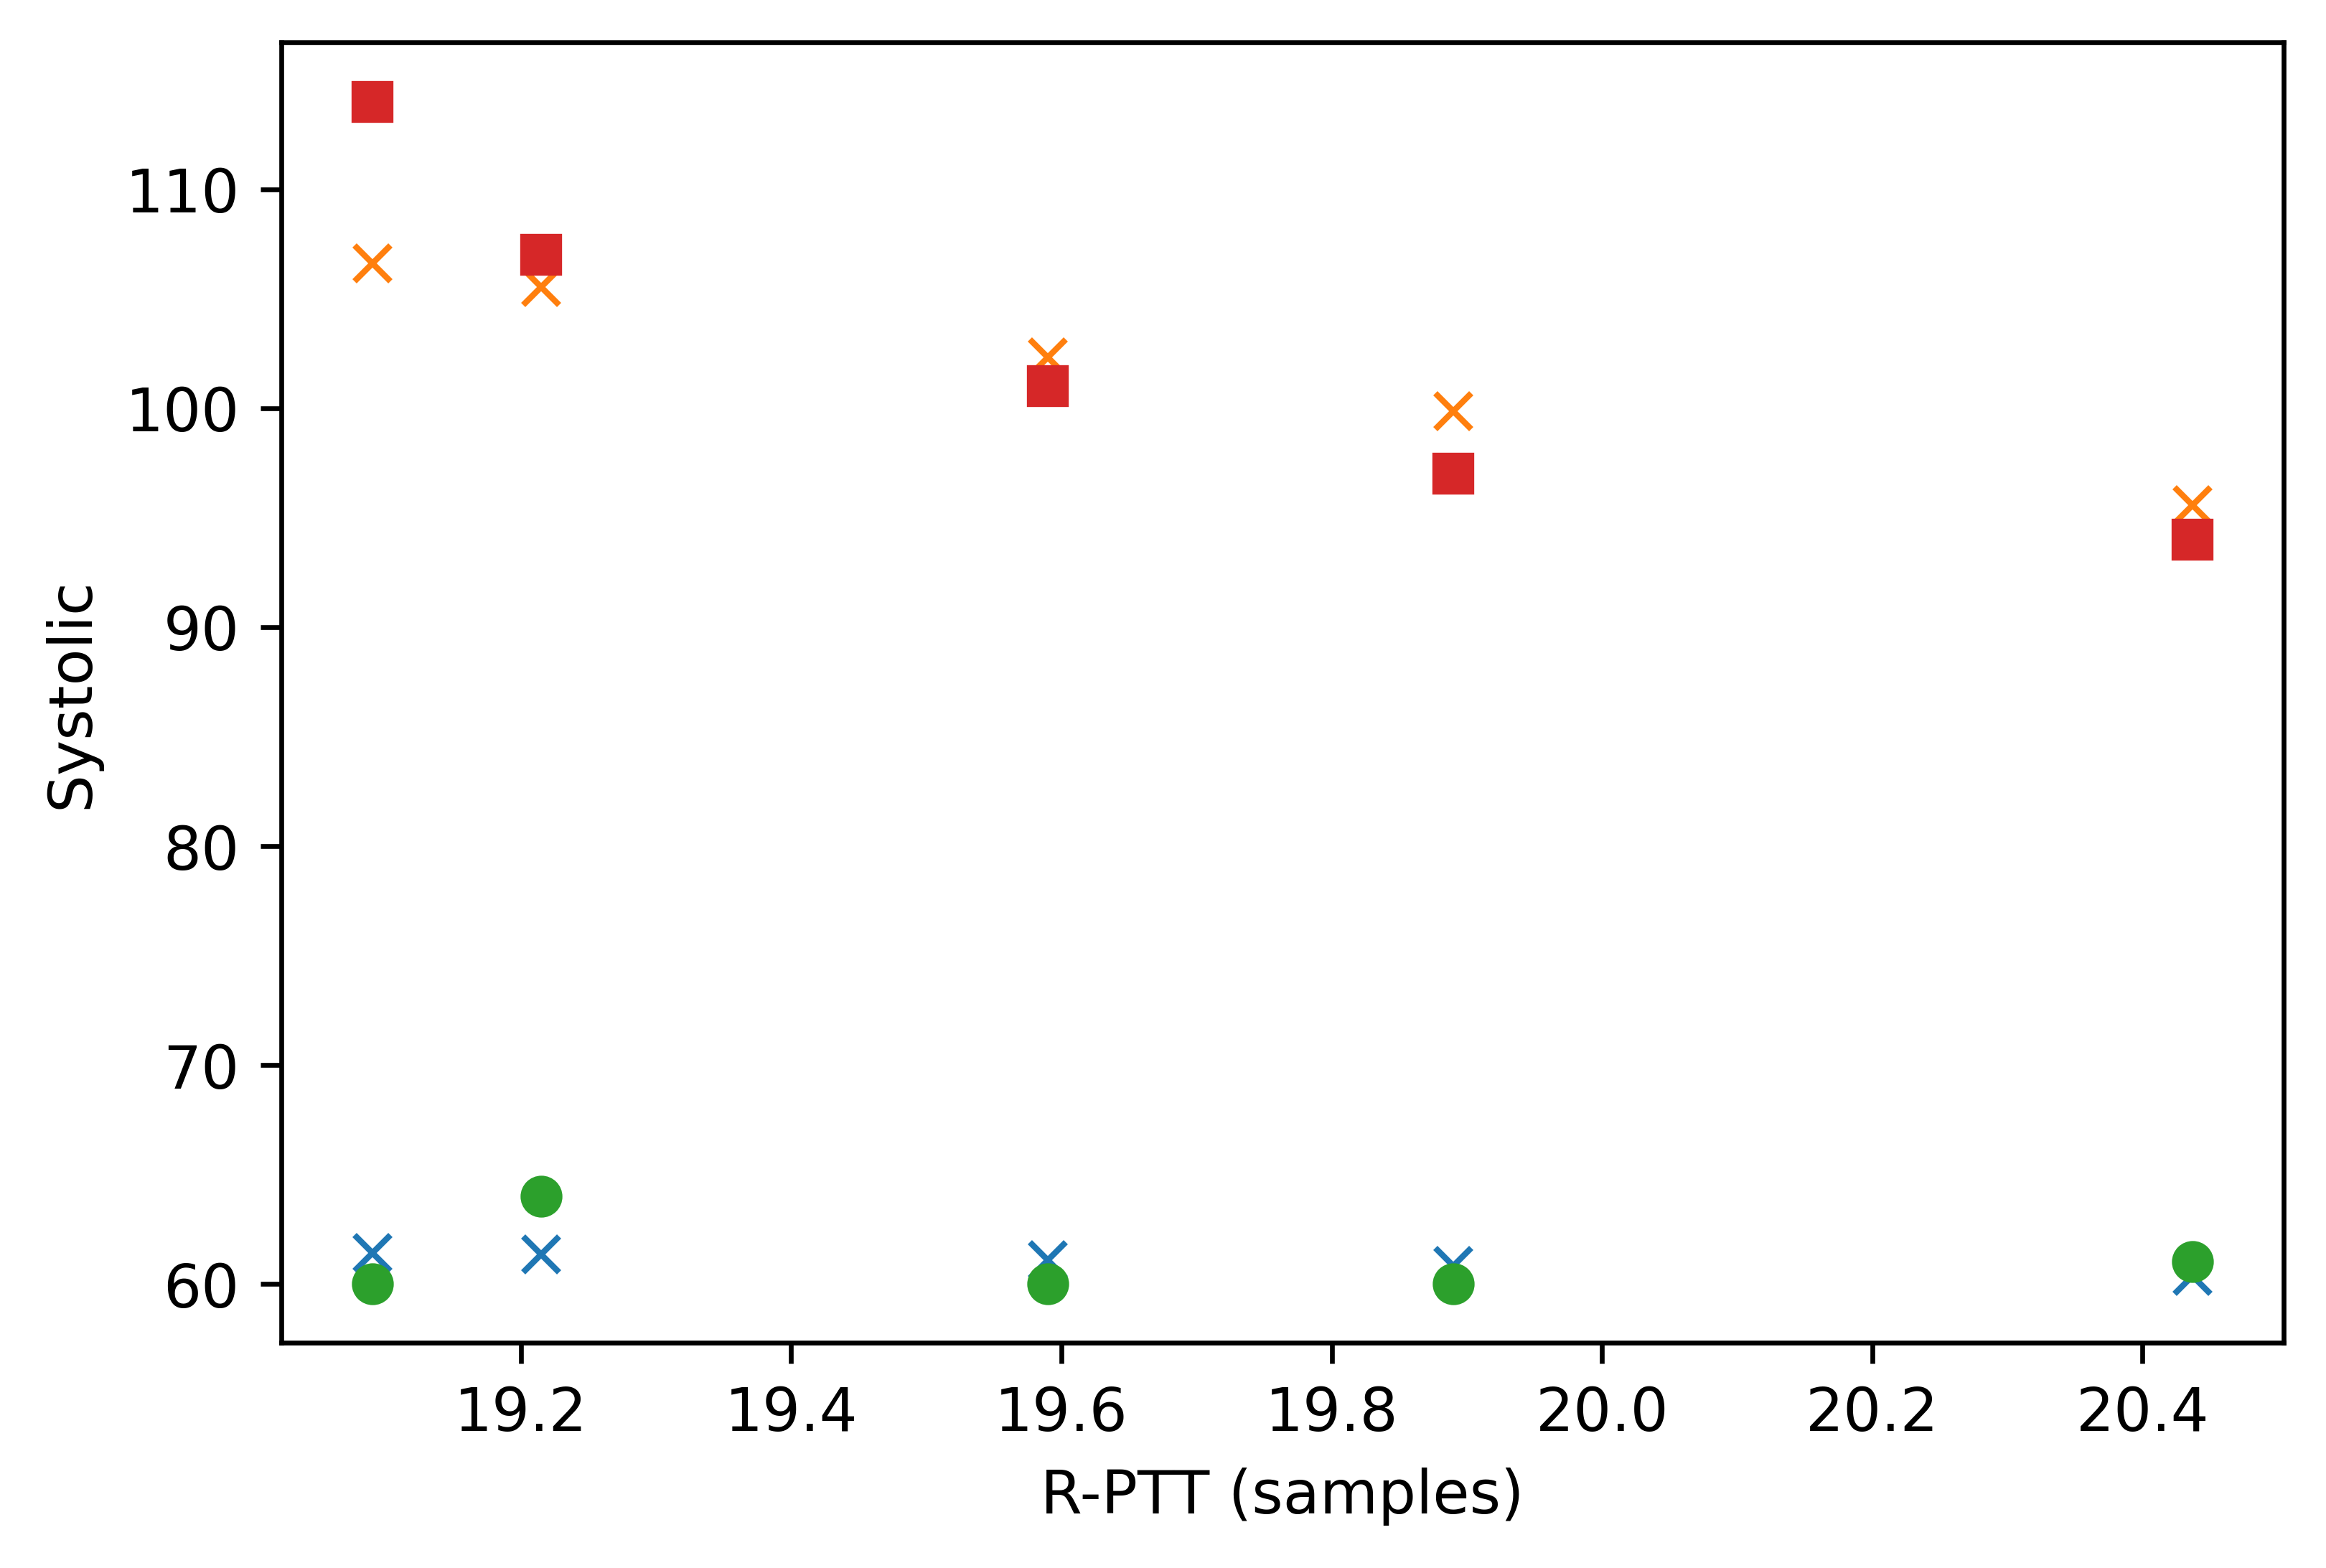

In [ ]:
# In[22]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_u, *params)
dbpt_p = SBPmodel(t_u, *params)
fig = plt.figure(dpi=600)
plt.xlabel("R-PTT (samples)")
plt.ylabel("Systolic")


plt.plot(t_u.numpy(), t_p.detach().numpy(),'x')
plt.plot(t_u.numpy(), dbpt_p.detach().numpy(),'x')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_u.numpy(), t_s.numpy(), 's')

In [ ]:
sbp_pre = SBPmodel(t_u,*params)

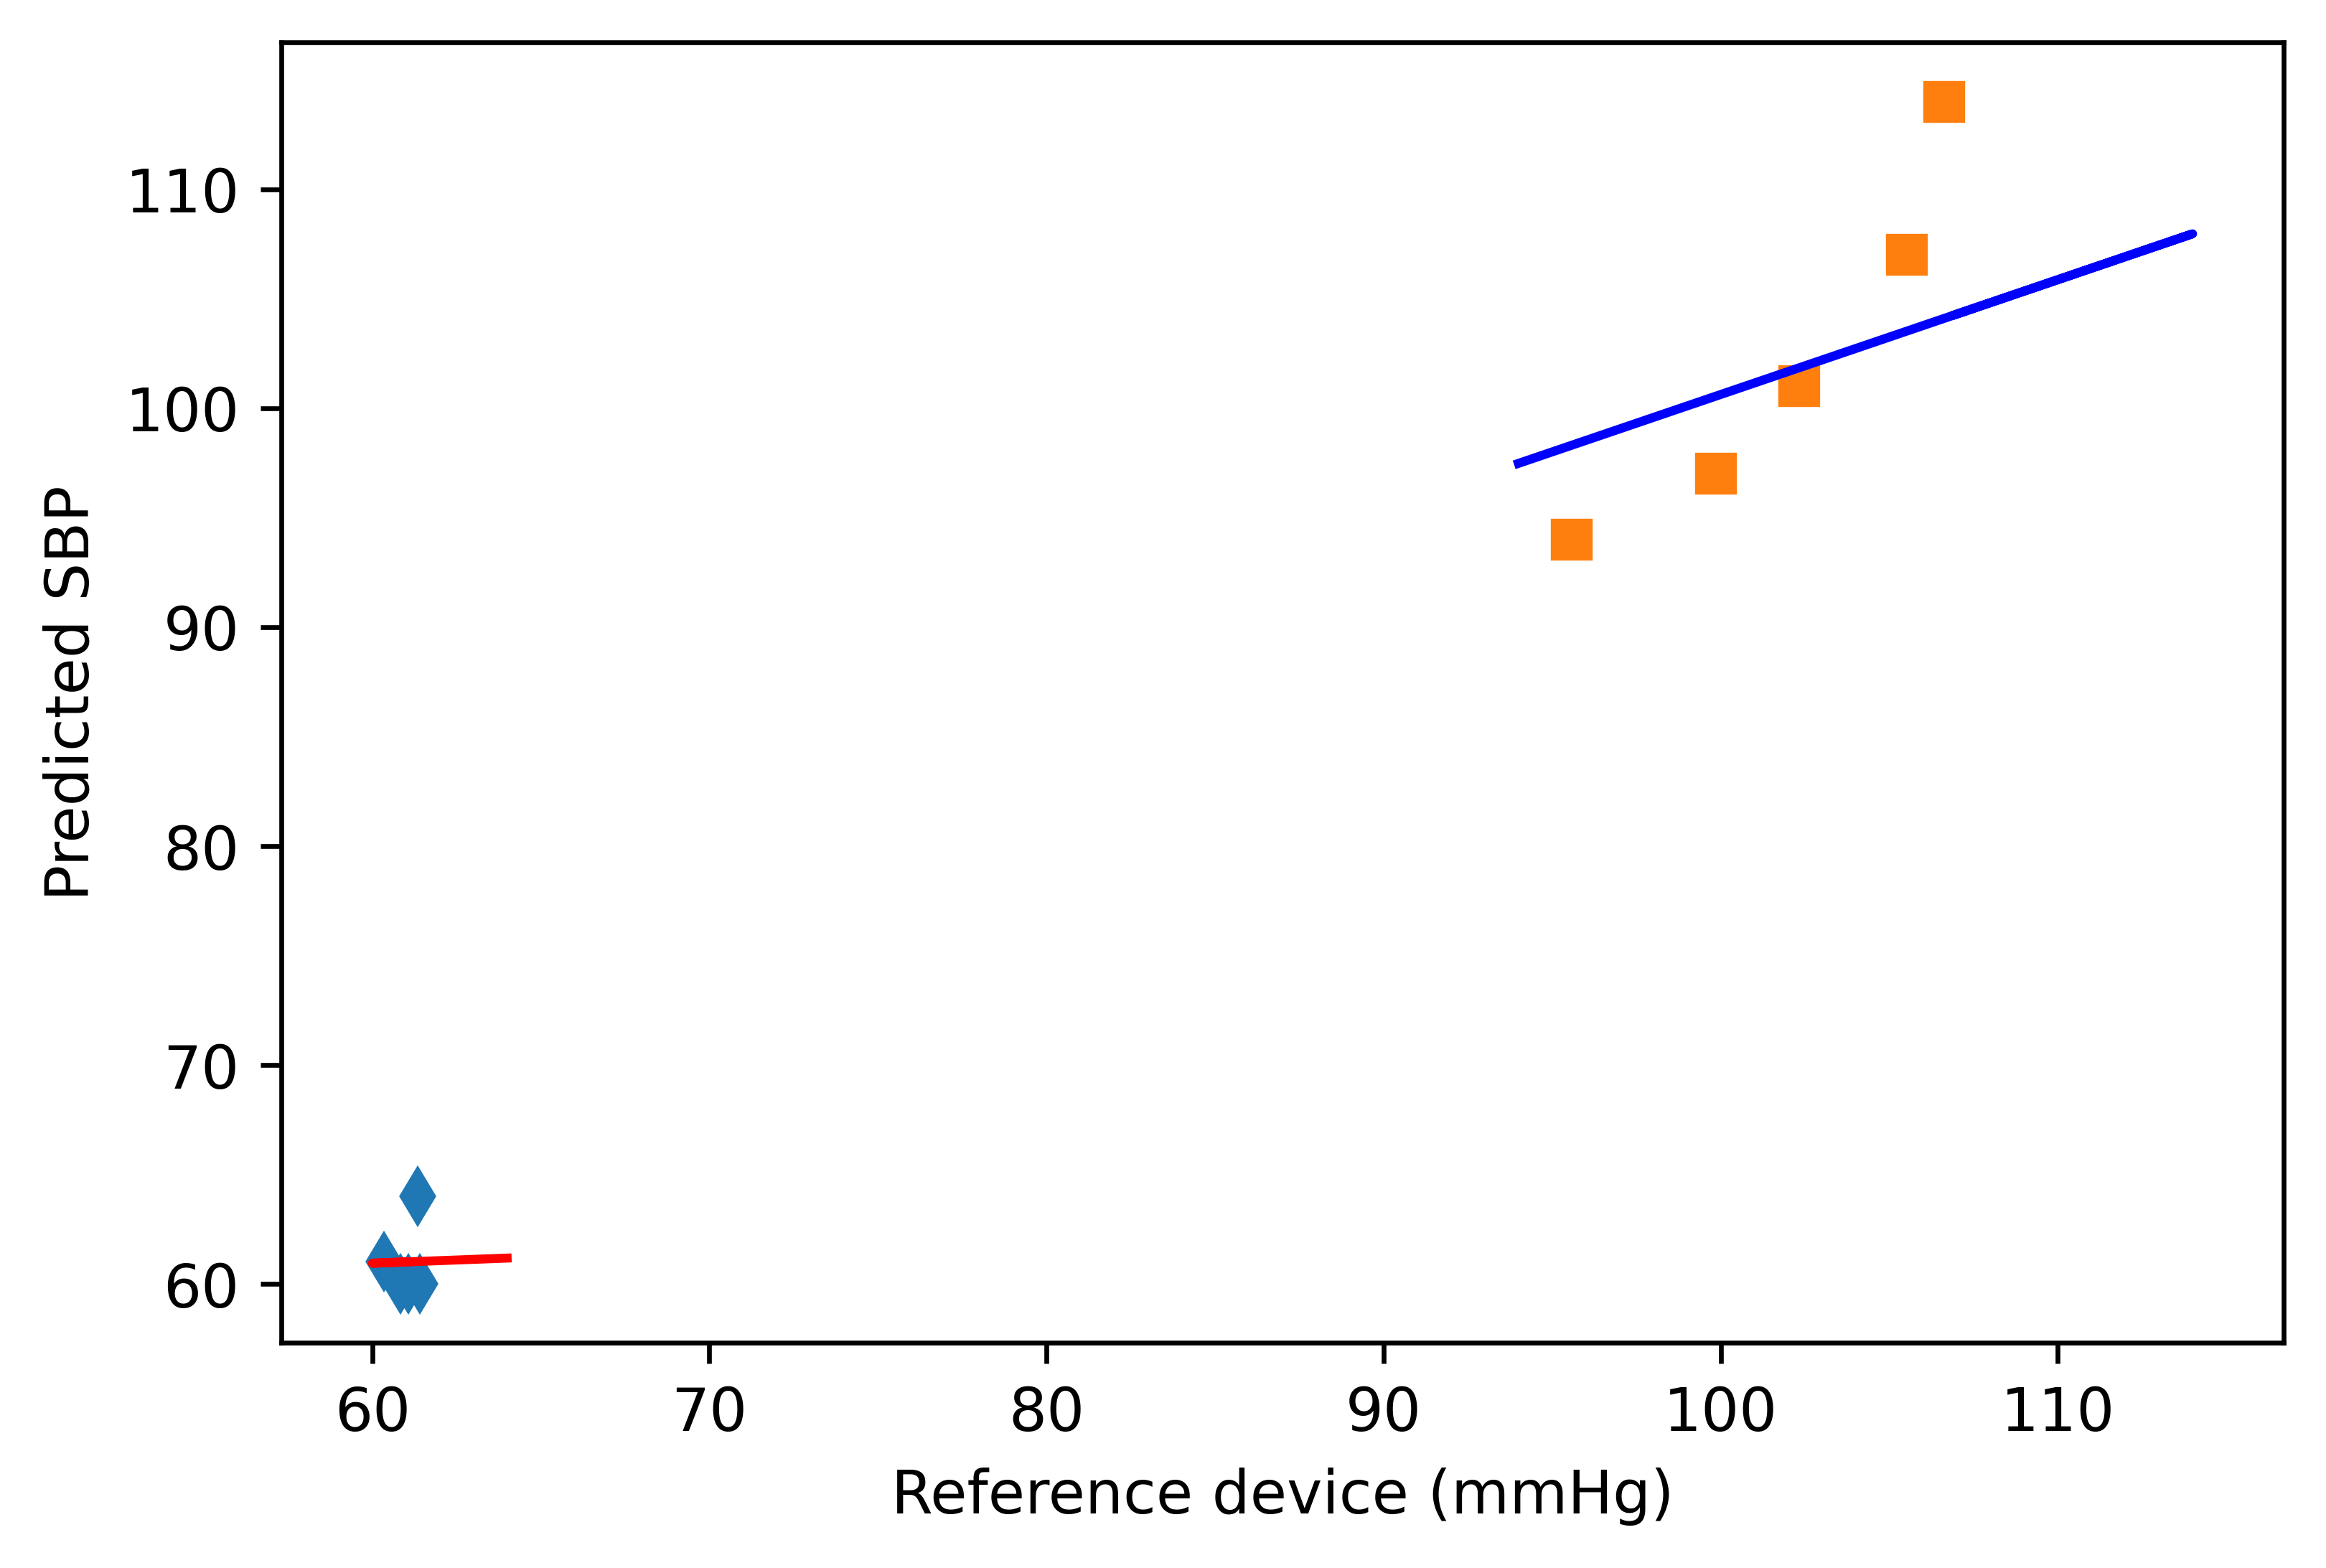

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
#from matplotlib import pyplot as plt

t_p = model(t_u, *params)
sbpt_p = SBPmodel(t_u, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Reference device (mmHg)")
plt.ylabel("Predicted SBP")

X = t_c.numpy().reshape(-1,1)
Y = t_p.numpy().reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

X1 = t_s.numpy().reshape(-1,1)
Y1 = sbpt_p.numpy().reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(X1, Y1)  # perform linear regression
Y1_pred = linear_regressor.predict(X1)

#plt.scatter(X, Y)
plt.plot(t_p.detach().numpy(), t_c.numpy(),'d')
plt.plot(sbpt_p.detach().numpy(), t_s.numpy(),'s')
plt.plot(X, Y_pred, color='red')
plt.plot(X1, Y1_pred, color='blue')
#plt.show()




#plt.plot(t_p.numpy(), dbpt_p.detach().numpy(),'x')
#plt.plot(t_u.numpy(), t_c.numpy(), 'o')
#plt.plot(t_u.numpy(), t_s.numpy(), 's')

In [ ]:
t_p.detach().numpy()

array([61.33823 , 61.421234, 61.066914, 60.827507, 60.345444],
      dtype=float32)

In [ ]:
model(18.235,*params)

tensor(61.8756)